In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# IMPACT OF FINANCIAL HABITS ON WORK PRODUCTIVITY


# Content
>>## 1. Introduction
>>> ### a. Key Objectives
>>> ### b. Data source
>>> ### c. Data Shape
>>> ### d. Financial Habits Measured and Their Meaning
>>## 2. Respondents Demographics
>>> ### a. Age and Gender Characteristics of Respondents
>>> ### b. Respondents Qualifications
>>## 3. Important Insights and Their Applications
>>## 4. Detailed Analysis
>>> ### a. Distribution of Financial Habit Variables Using Histogram
>>> ### b. Relationship of Key Financial Habits on Employee Work Attitude and Productivity Using Scatter Plot and Regression Line
>>> ### c. Summary Table of Correlation Analysis and P_value of Financial Habit Variables on Employee Productivity and its Interpretations
>>> ### d. Relationship of Qualifications with Intrapreneurial Ability and Positive Work Attitude
>>## 5. Multiple Regression Model to Predict Dependent Money Generating Skills Using Money Retention Skills and Financial Philosophy
>>## 6. Conclusion
>>## 7. Appendix
>>> ### a. Code for the Ttest Analysis for Mean Difference  and Qualification Category
>>> ### b. Code for Calculating the Correlation Coefficients and P-value of Financial Habits


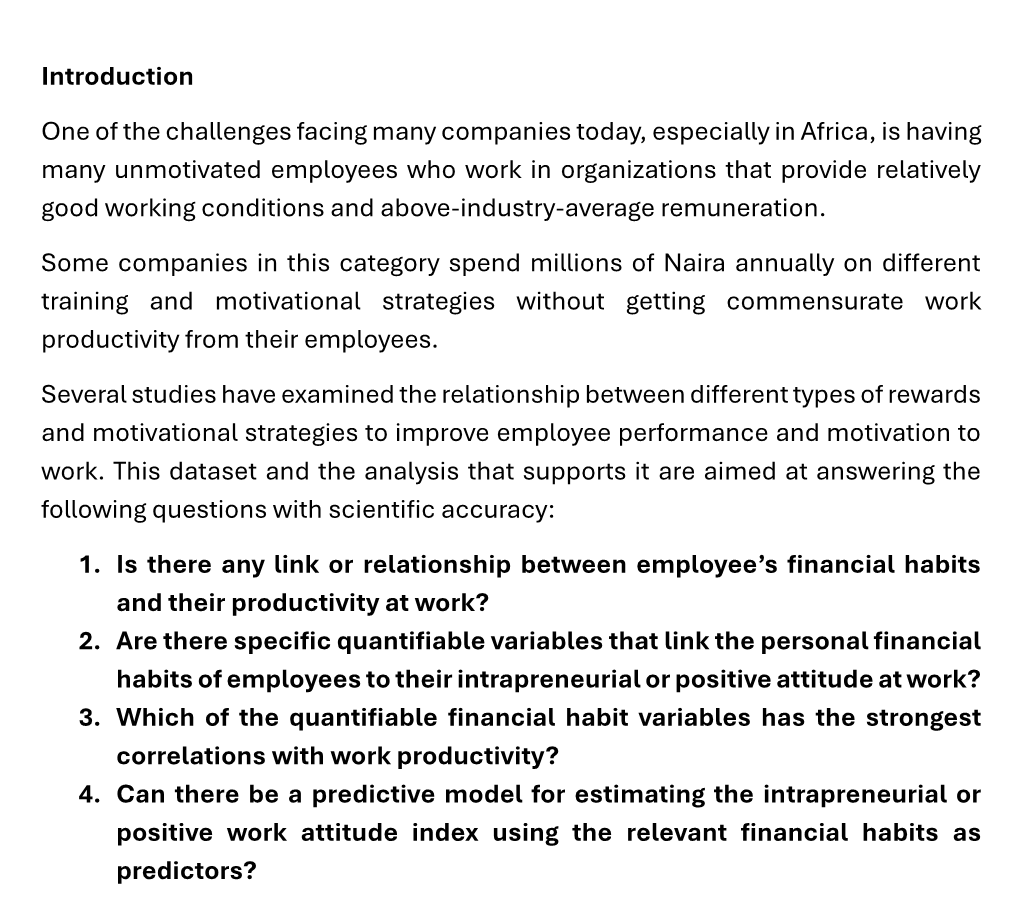


## Data Source

The data set used for this analysis is sourced from the database of a validated psychometric test called Findex (Financial Success Index). Findex is an online test used to measure five variables driving financial stability and sustainability among people. 
The test is based on core principles of financial success documented by classic work written by the following authors: George Samuel Clason, Dr. Thomas J. Stanley, Napoleon Hill, Tev Harv  Eker, Robert G. Allen, Brian Tracy, Jack Canfield, Mark Victor Hanson, etc.
The original dataset contains a total of 250 records but was reduced to 184 records after data cleaning. 
</p> 


## Data Shape

In [9]:
findex = pd.read_csv(r"C:\Users\Abraham Laleye\Desktop\Data Analytics New Psychometric\findex_data\findex_test_results.csv")
findex.head()

,age,sex,qualification,findex_score,fin_philosophy,money_retention,dep_money_generation,ind_money_gen,money_multiplication
0,25,m,BSc,83,95,97,97,58,67
1,42,f,MSc,80,90,85,97,72,58
2,54,m,BSc,78,85,73,89,80,65
3,21,f,BSc,76,92,75,87,65,62
4,36,m,OND,75,90,65,90,65,63


In [10]:
findex.dtypes

age                      int64
sex                     object
qualification           object
findex_score             int64
fin_philosophy           int64
money_retention          int64
dep_money_generation     int64
ind_money_gen            int64
money_multiplication     int64
dtype: object

In [11]:
findex.describe()

,age,findex_score,fin_philosophy,money_retention,dep_money_generation,ind_money_gen,money_multiplication
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,30.032609,52.364130,56.168478,55.222826,58.967391,46.885870,44.521739
std,7.373637,11.258173,14.041270,13.231826,14.623098,11.202216,11.104549
min,17.000000,26.000000,27.000000,27.000000,32.000000,25.000000,18.000000
25%,25.000000,44.000000,47.000000,45.000000,48.000000,38.000000,37.000000
50%,29.000000,51.500000,55.000000,53.000000,58.000000,45.000000,43.000000
75%,35.000000,61.000000,65.000000,65.000000,70.000000,53.000000,52.000000
max,54.000000,83.000000,95.000000,97.000000,97.000000,80.000000,75.000000


## Finacial Habits Measured and Their Meaming

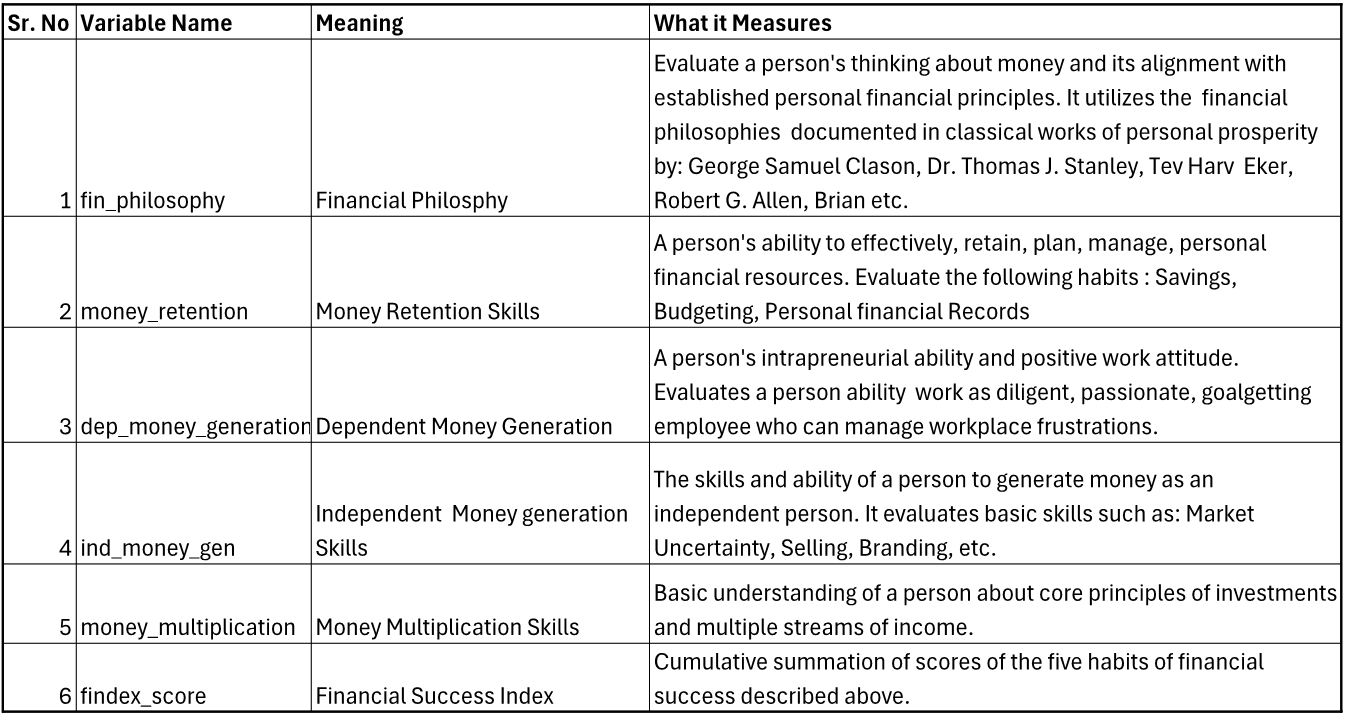

## Respondents Demographics

### Age and Gender Characteristics of Participants

In [16]:
sex_summary = findex.sex.value_counts()
sex_summary

sex
m    101
f     83
Name: count, dtype: int64

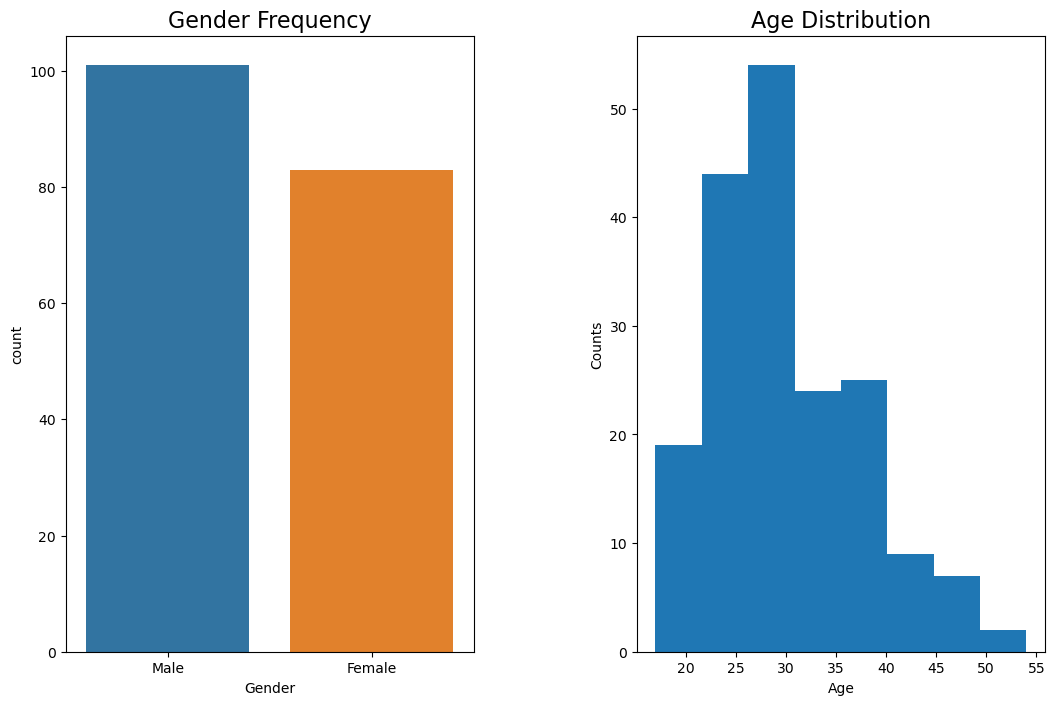

In [17]:
plt.figure(figsize=(20,8))
ax = plt.subplot(1,3,1)
sns.countplot(x=findex.sex)
plt.title('Gender Frequency', fontsize=16)
plt.xlabel('Gender')
ax.set_xticklabels(['Male','Female'])
plt.subplots_adjust(wspace=0.4)
plt.subplot(1,3,2)
plt.hist(findex.age, bins=8)
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Counts')
plt.savefig('age_distribution.png')
plt.show()



### Respondents Qualifications

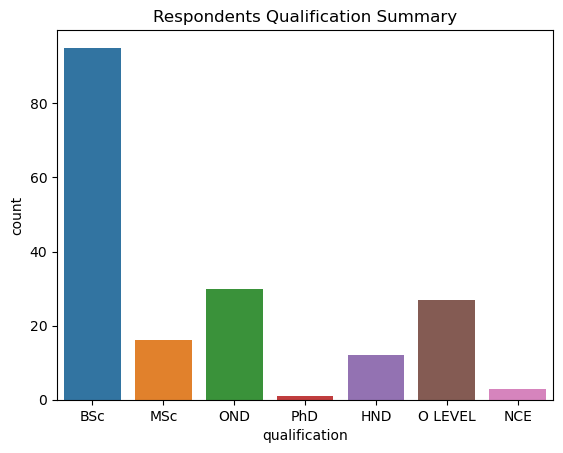

In [19]:
plt.Figure(figsize=(15,10))
sns.countplot(x=findex.qualification)
plt.title('Respondents Qualification Summary')
plt.savefig('Respondent_qualifications.png')
plt.show()
plt.close()

In [20]:
qualification_summary = findex.qualification.value_counts(normalize=True)
qualification_summary


qualification
BSc        0.516304
OND        0.163043
O LEVEL    0.146739
MSc        0.086957
HND        0.065217
NCE        0.016304
PhD        0.005435
Name: proportion, dtype: float64

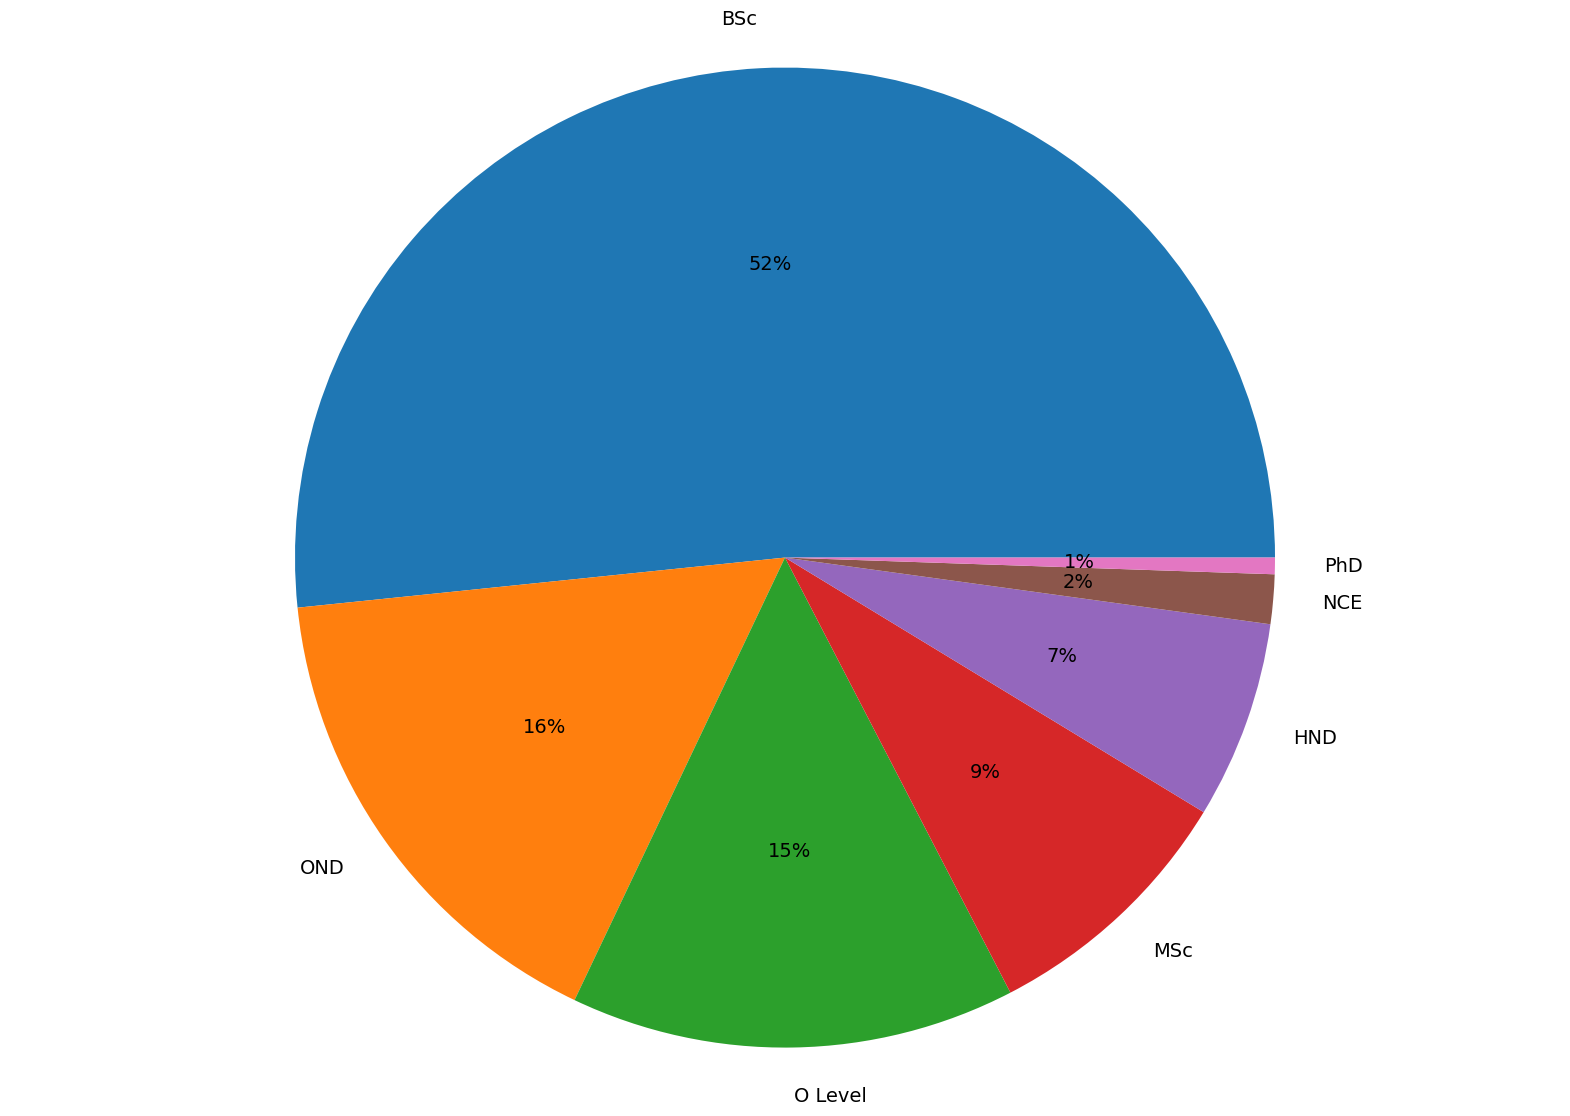

In [21]:
plt.figure(figsize=(20,14))
ax = plt.subplot(1,1,1)
labels = ['BSc','OND','O Level','MSc','HND','NCE','PhD']
plt.pie(qualification_summary, labels =labels, autopct='%.0f%%' )
plt.setp(ax.texts, size=14)
plt.axis('equal')
plt.show()
plt.close()

# Important Insights From Data Analysis

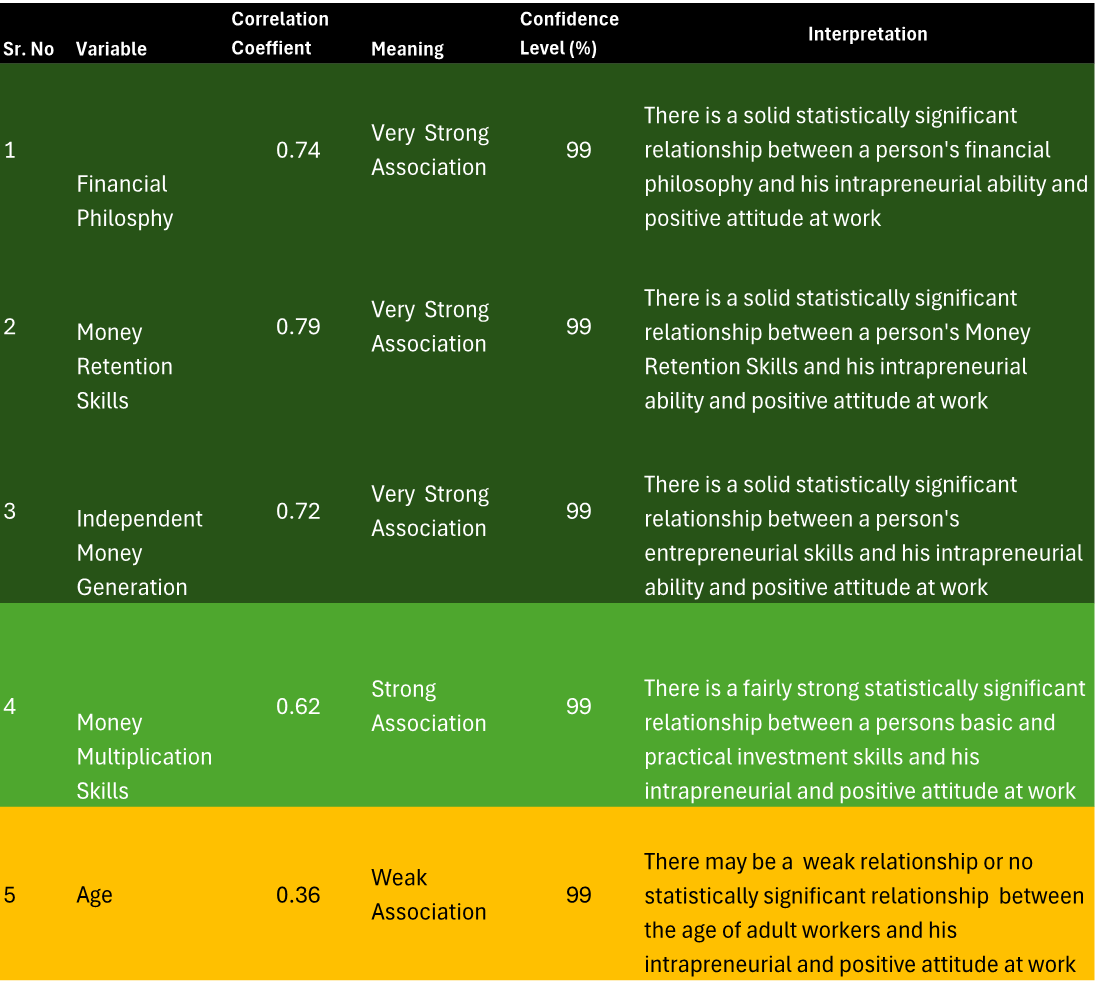

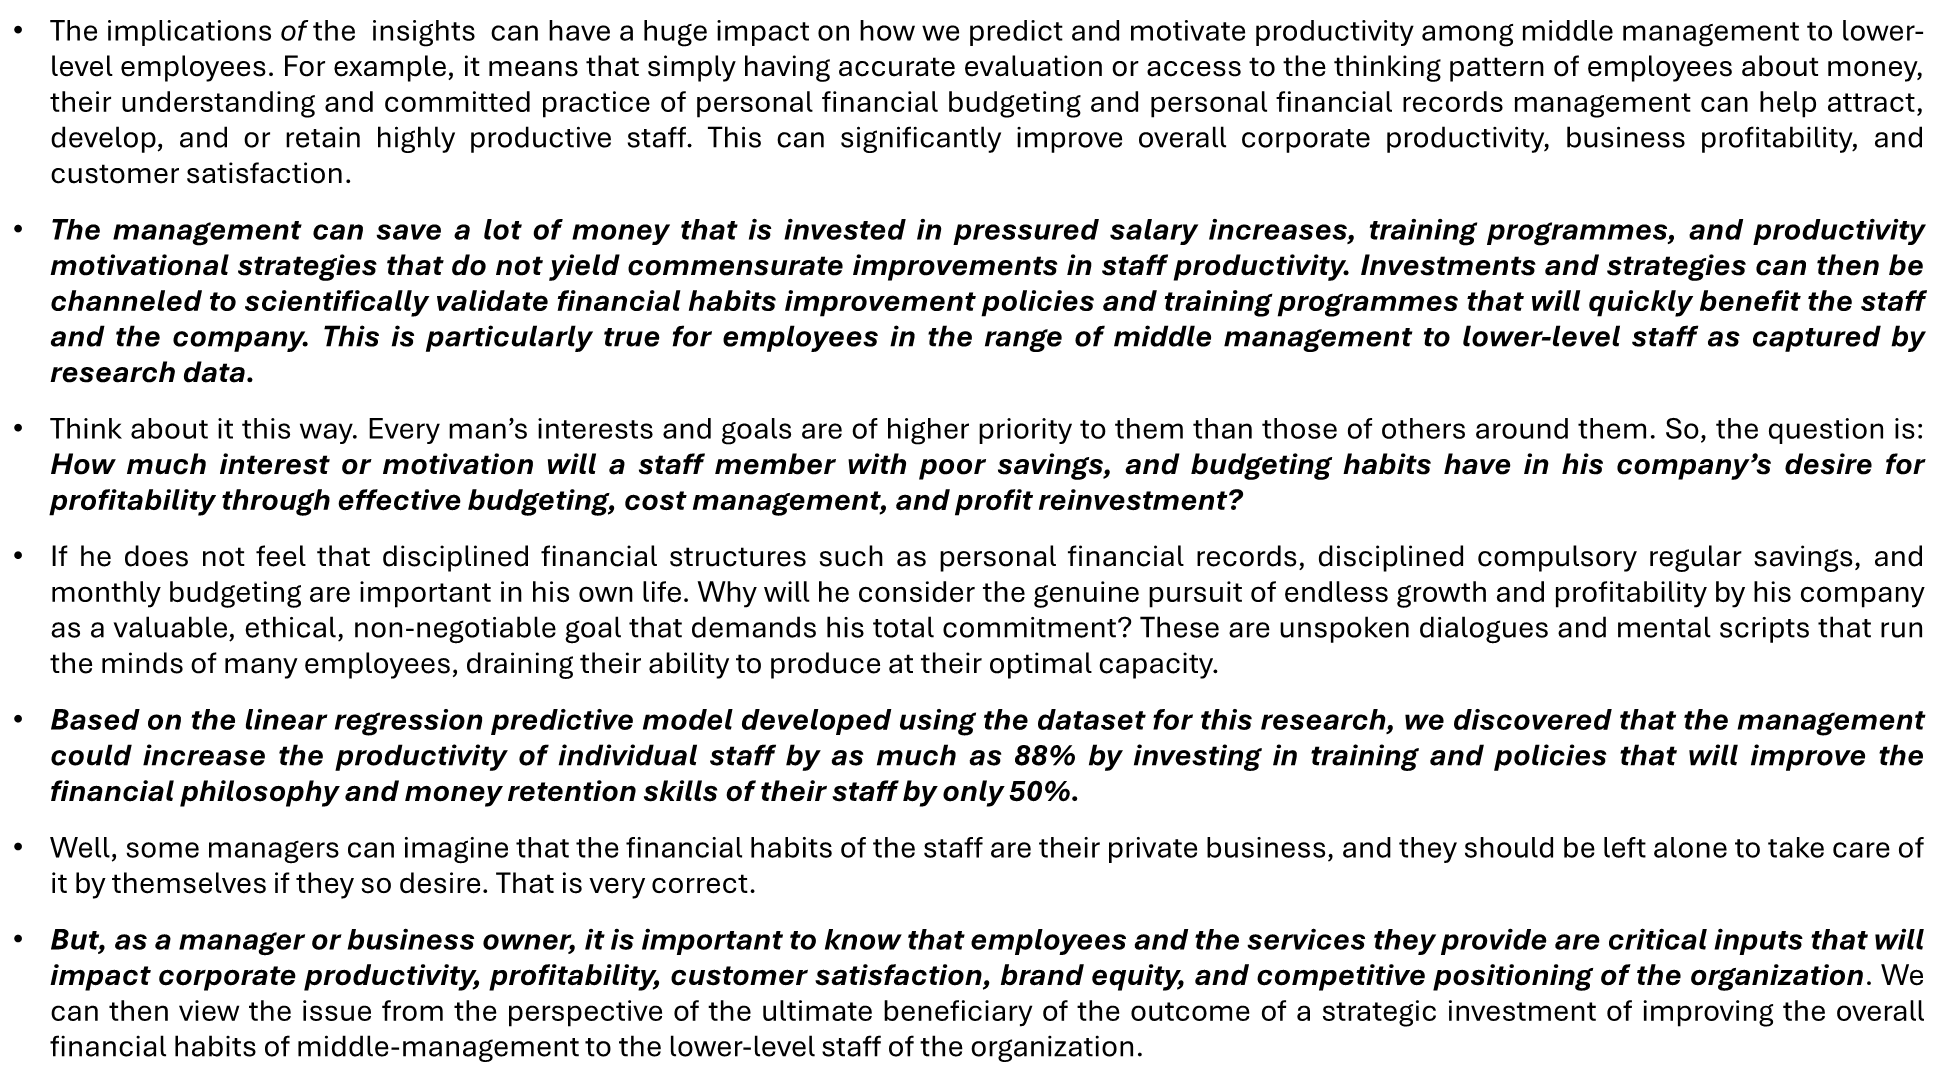tion.


# Detailed Analysis

## Distribution of Finacial Habits Measured
#### the histogram shows that variables are relatively normally distributed

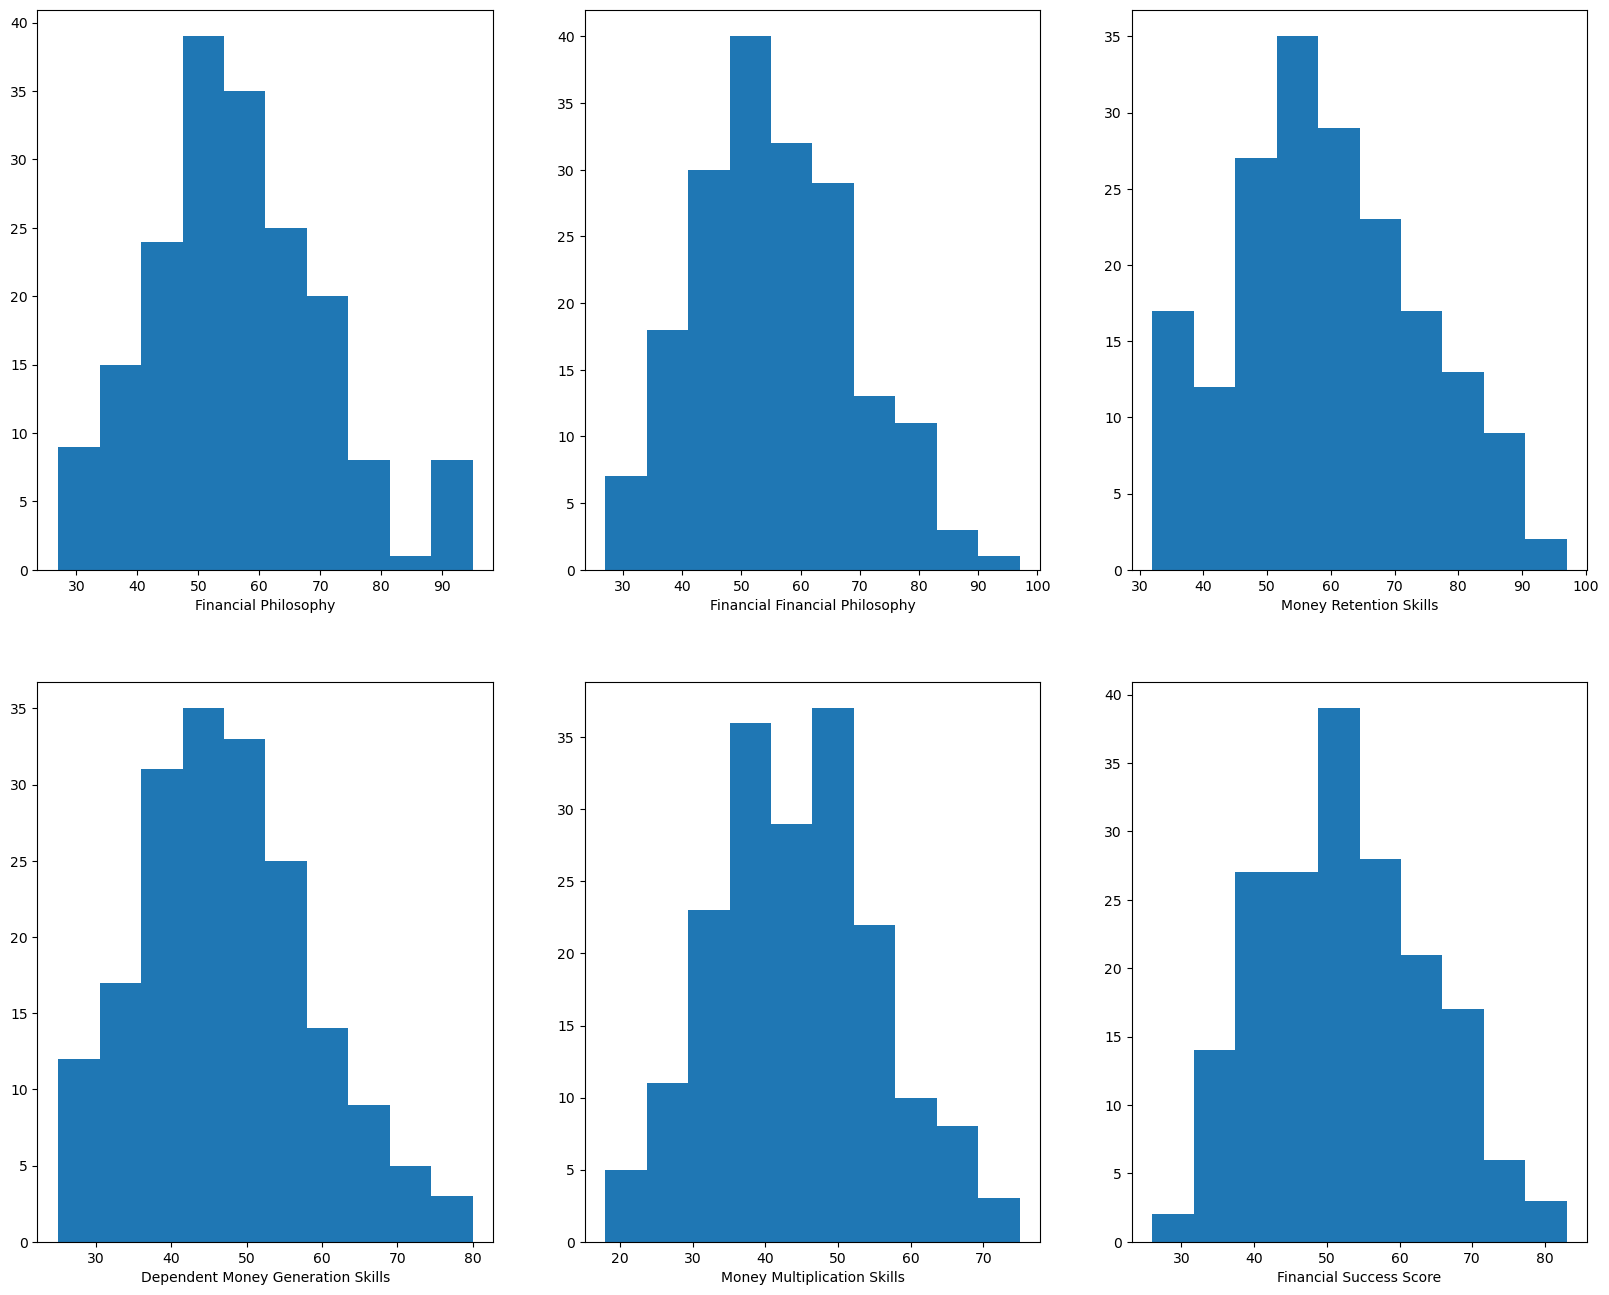

In [27]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,6)
plt.hist(findex.findex_score)
plt.xlabel('Financial Success Score')
plt.subplot(2,3,1)
plt.hist(findex.fin_philosophy)
plt.xlabel('Financial Philosophy')
plt.subplot(2,3,2)
plt.xlabel('Financial Financial Philosophy')
plt.hist(findex.money_retention)
plt.subplot(2,3,3)
plt.xlabel('Money Retention Skills')
plt.hist(findex.dep_money_generation)
plt.subplot(2,3,4)
plt.xlabel('Dependent Money Generation Skills')
plt.hist(findex.ind_money_gen)
plt.subplot(2,3,5)
plt.xlabel('Independent Money Generation Skills')
plt.hist(findex.money_multiplication)
plt.xlabel('Money Multiplication Skills')
plt.show()
plt.close()

## Relationship of Key Financial Habits on Employee Work Attitude and Productivity 

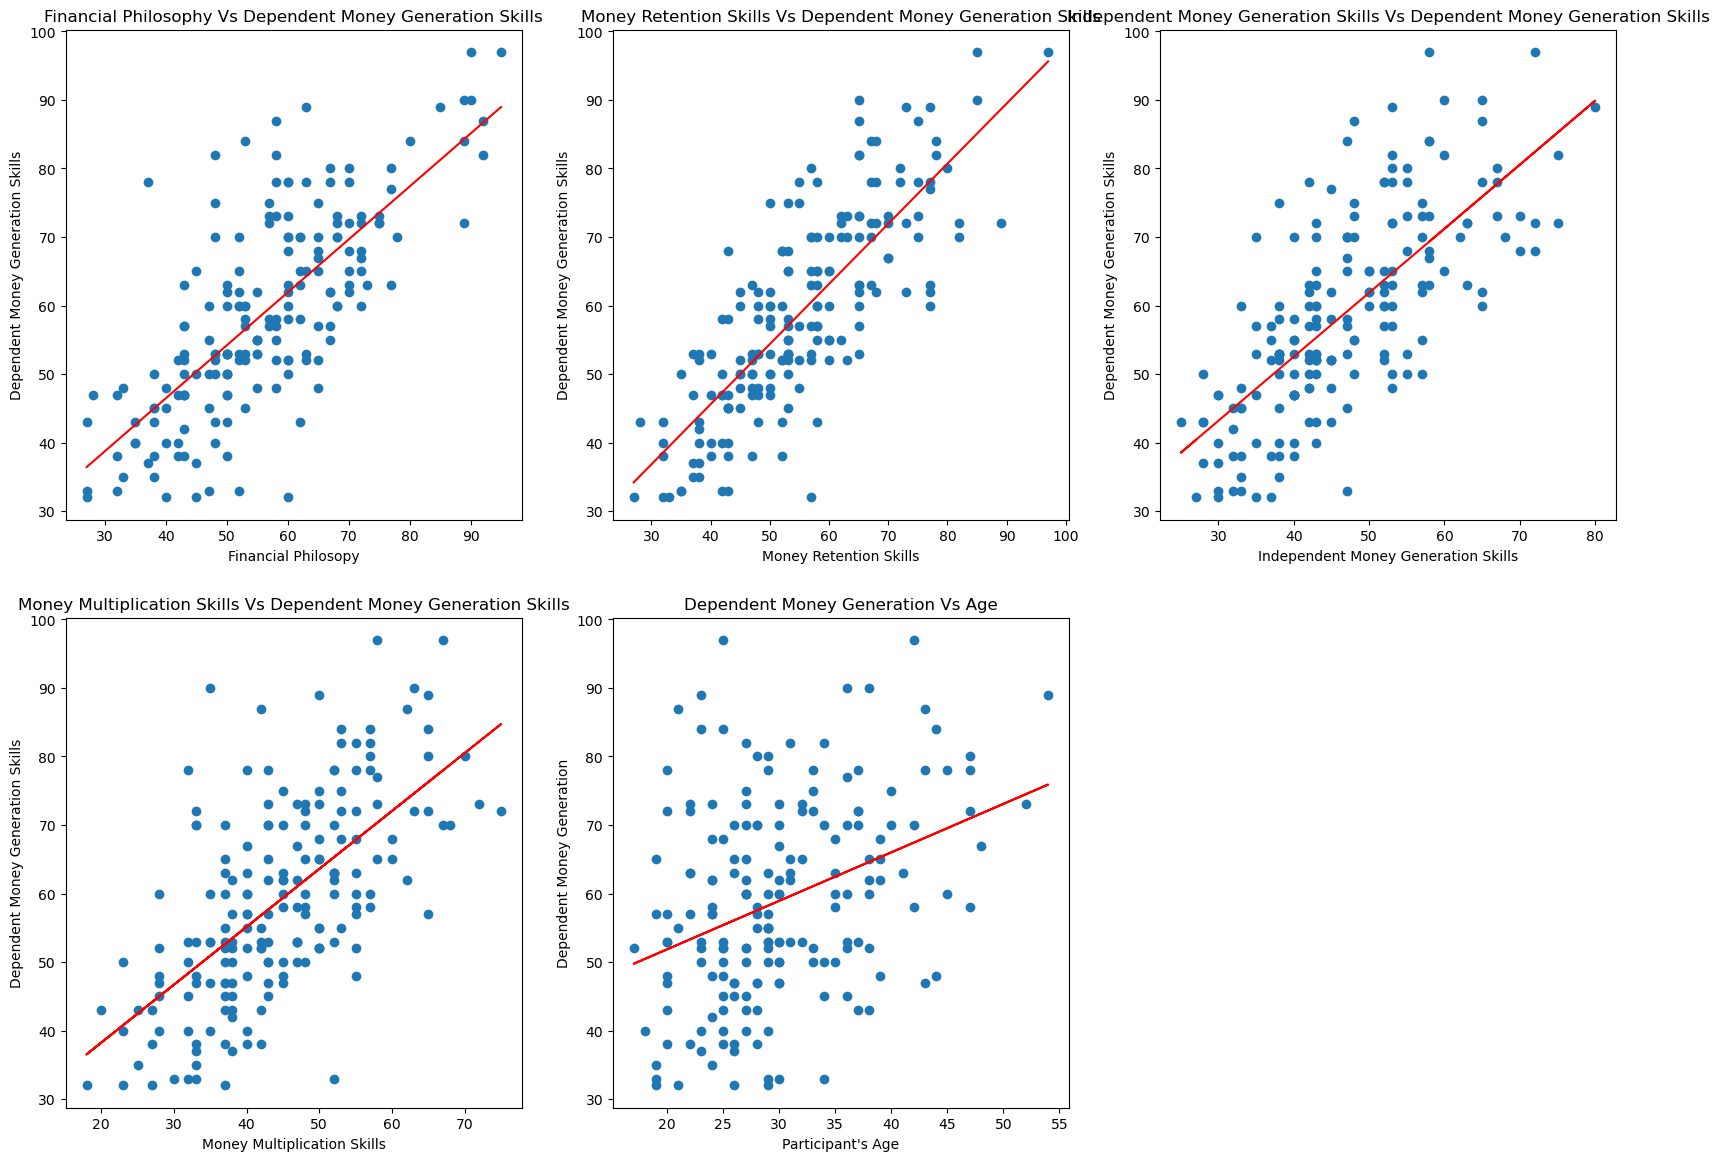

In [29]:
plt.figure(figsize=(20,14))
plt.subplot(2,3,1)
plt.scatter(x=findex.fin_philosophy, y=findex.dep_money_generation)
model =sm.OLS.from_formula('dep_money_generation ~ fin_philosophy', data=findex)
result = model.fit()
fitted_values = result.fittedvalues
plt.plot(findex.fin_philosophy, fitted_values, color= 'red')
plt.xlabel('Financial Philosopy')
plt.ylabel('Dependent Money Generation Skills')
plt.title('Financial Philosophy Vs Dependent Money Generation Skills' )
plt.subplot(2,3,2)
plt.scatter(x=findex.money_retention, y=findex.dep_money_generation)
model =sm.OLS.from_formula('dep_money_generation ~ money_retention', data=findex)
result = model.fit()
fitted_values = result.fittedvalues
plt.plot(findex.money_retention, fitted_values, color= 'red')
plt.xlabel('Money Retention Skills')
plt.ylabel('Dependent Money Generation Skills')
plt.title('Money Retention Skills Vs Dependent Money Generation Skills')
plt.subplot(2,3,3)
plt.scatter(x=findex.ind_money_gen, y=findex.dep_money_generation)
model =sm.OLS.from_formula('dep_money_generation ~ ind_money_gen', data=findex)
result = model.fit()
fitted_values = result.fittedvalues
plt.plot(findex.ind_money_gen, fitted_values, color= 'red')
plt.xlabel('Independent Money Generation Skills')
plt.ylabel('Dependent Money Generation Skills')
plt.title('Independent Money Generation Skills Vs Dependent Money Generation Skills')
plt.subplot(2,3,4)
plt.scatter(x=findex.money_multiplication, y=findex.dep_money_generation)
model =sm.OLS.from_formula('dep_money_generation ~ money_multiplication', data=findex)
result = model.fit()
fitted_values = result.fittedvalues
plt.plot(findex.money_multiplication, fitted_values, color= 'red')
plt.xlabel('Money Multiplication Skills')
plt.ylabel('Dependent Money Generation Skills')
plt.title('Money Multiplication Skills Vs Dependent Money Generation Skills')
plt.subplot(2,3,5)
plt.scatter(x=findex.age, y= findex.dep_money_generation)
model =sm.OLS.from_formula('dep_money_generation ~ age', data=findex)
result = model.fit()
fitted_values = result.fittedvalues
plt.plot(findex.age, fitted_values, color= 'red')
plt.title('Dependent Money Generation Vs Age')
plt.xlabel("Participant's Age")
plt.ylabel('Dependent Money Generation')
plt.show()

## Summary of Correlation Analysis and its Interpretation

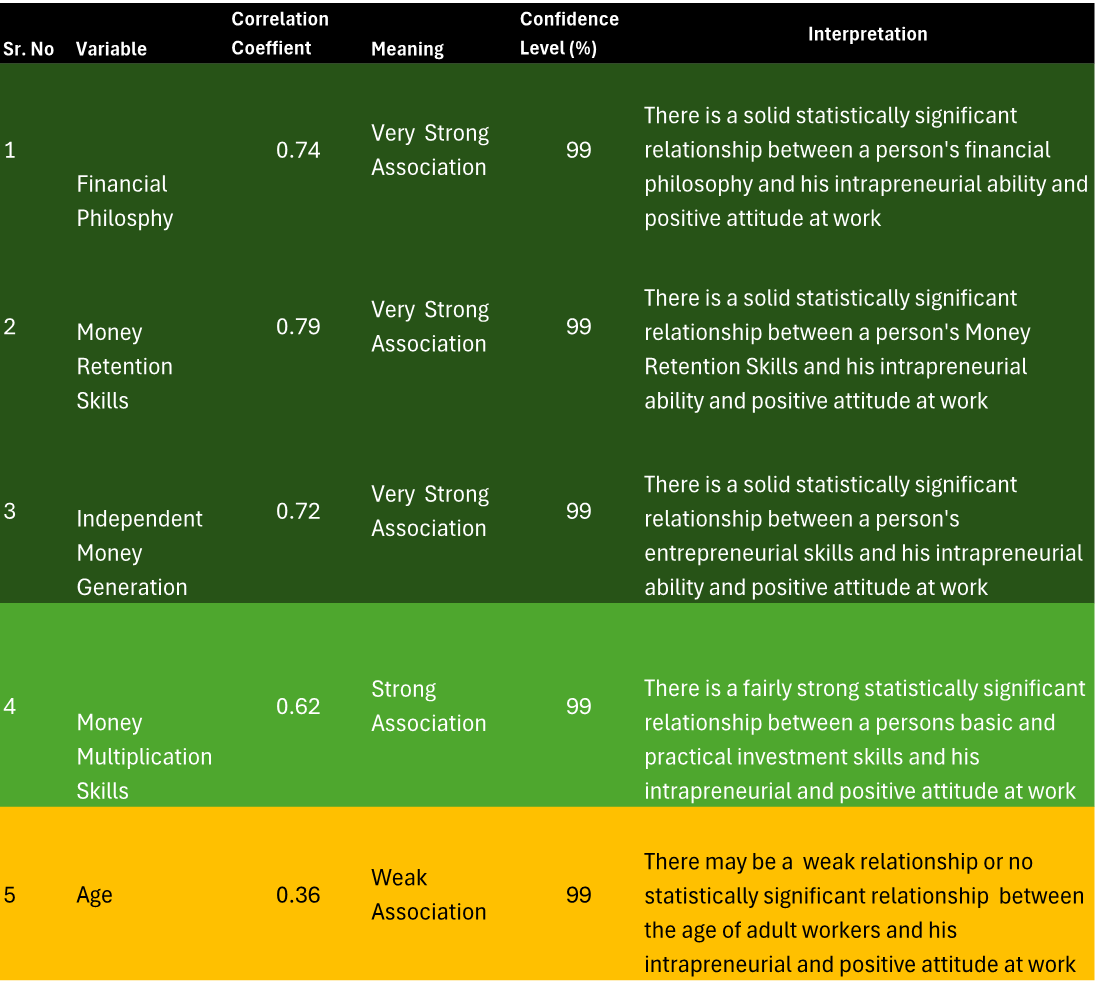

##  Relationship of Qualifications with Intrapreneurial Ability and Positive Work Attitude 

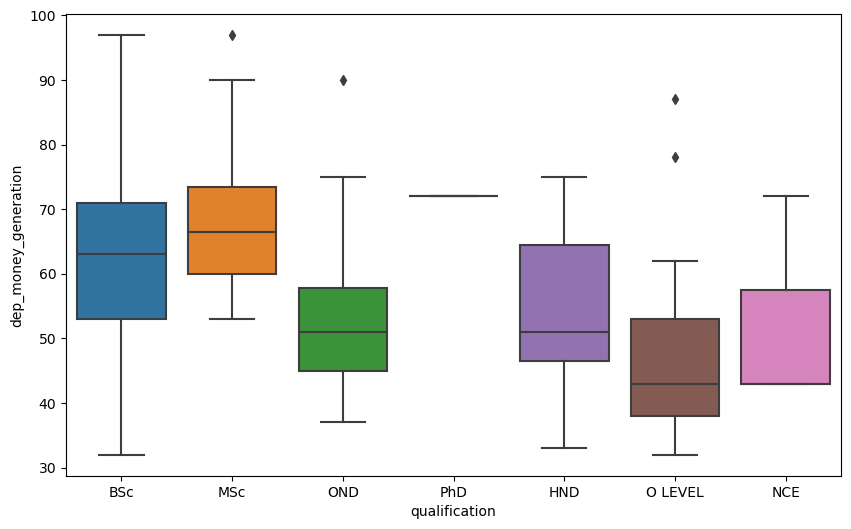

In [33]:
plt.figure(figsize=(10,6))
plt.subplot(1,1,1)
sns.boxplot(x=findex.qualification, y = findex.dep_money_generation)
plt.show()

In [34]:
ond_pop = findex[findex.qualification=='OND']
print(f' The mean for Participants with OND is:{ond_pop.dep_money_generation.mean().round(2)}')
olv_pop = findex[findex.qualification=='O LEVEL']
print(f' The mean for Participants with O LEVEL is:{olv_pop.dep_money_generation.mean().round(2)}')
bsc_pop = findex[findex.qualification=='BSc']
print(f' The mean for Participants with BSc is:{bsc_pop.dep_money_generation.mean().round(2)}')
hnd_pop = findex[findex.qualification=='HND']
print(f' The mean for Participants with HND is:{hnd_pop.dep_money_generation.mean().round(2)}')
nce_pop = findex[findex.qualification=='NCE']
print(f' The mean for Participants with NCE is:{nce_pop.dep_money_generation.mean().round(2)}')
msc_pop = findex[findex.qualification=='MSc']
print(f' The mean for Participants with MSc is:{msc_pop.dep_money_generation.mean().round(2)}')

 The mean for Participants with OND is:53.67
 The mean for Participants with O LEVEL is:47.7
 The mean for Participants with BSc is:62.87
 The mean for Participants with HND is:54.25
 The mean for Participants with NCE is:52.67
 The mean for Participants with MSc is:68.62


### Summary of the Statistical Significance of the Mean Difference Among Populations With Different Qualifications Using Independent T-Test

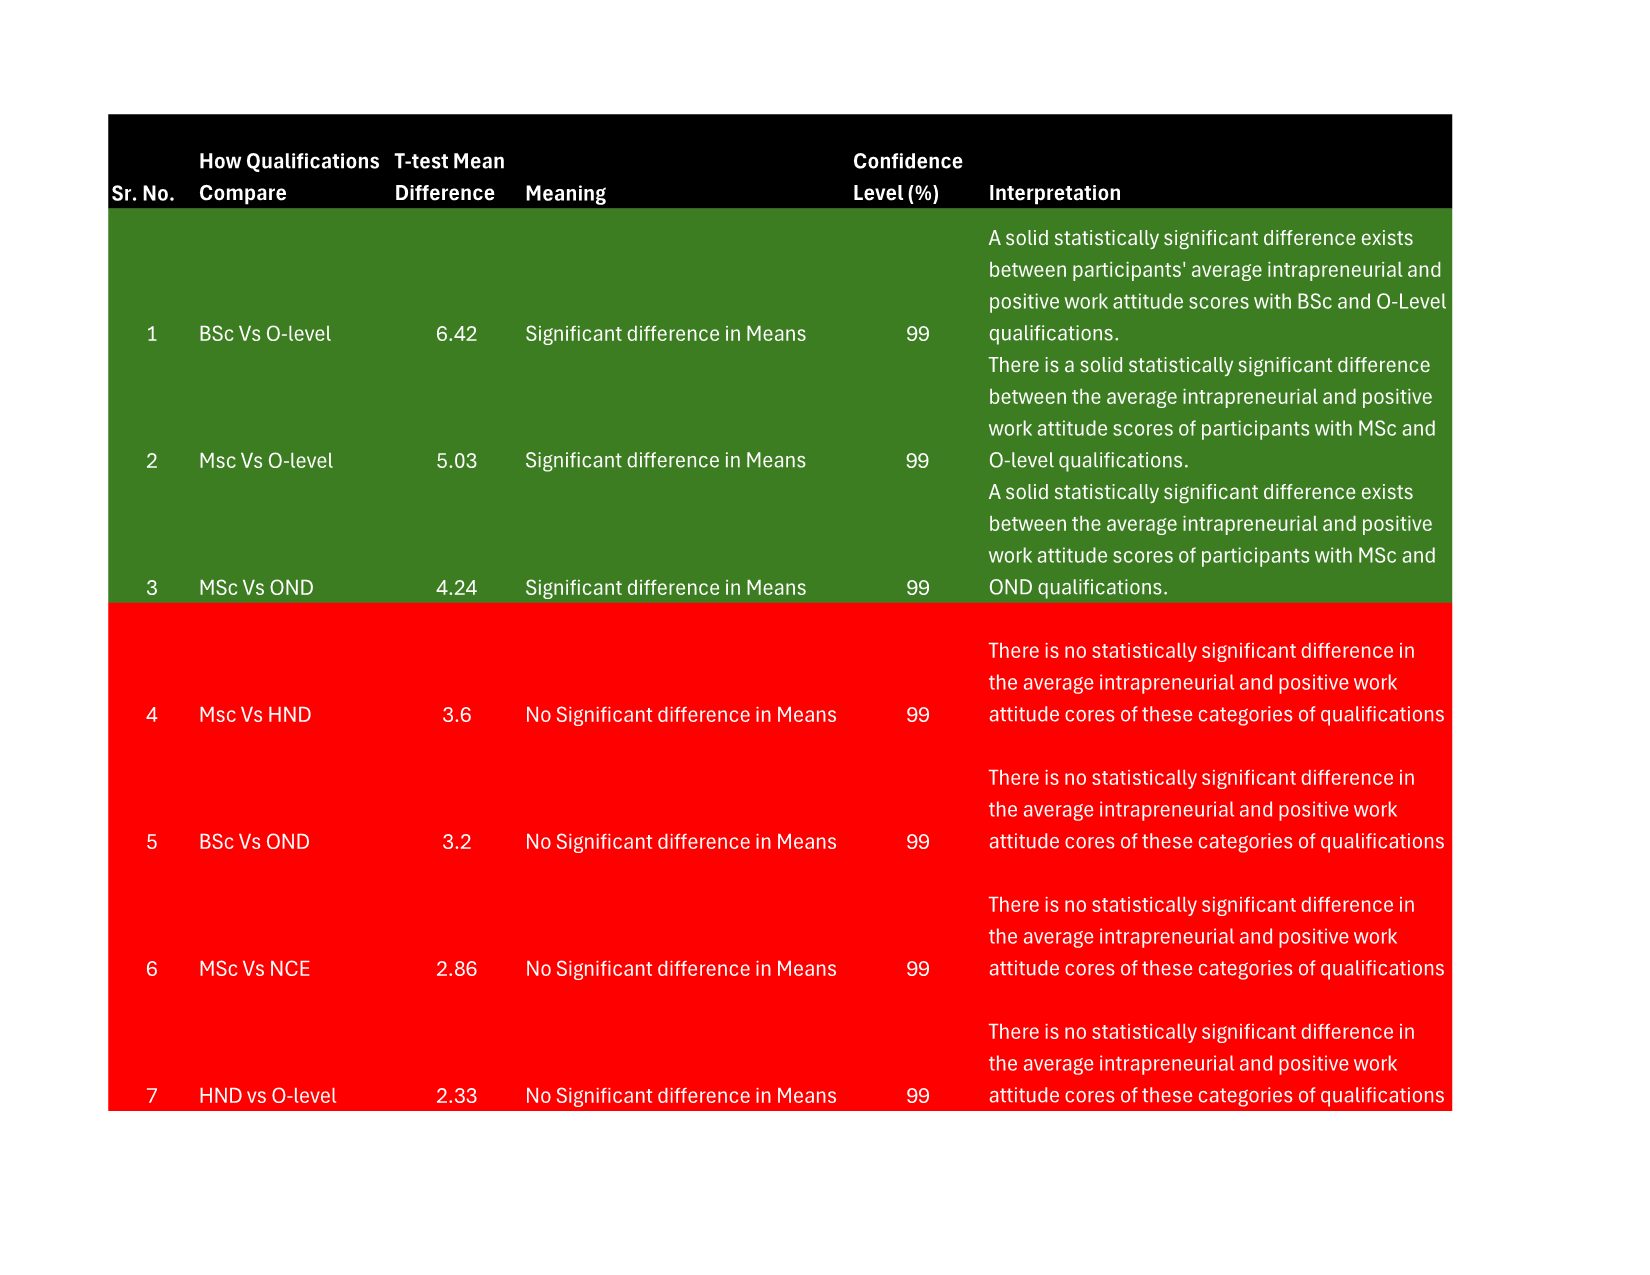
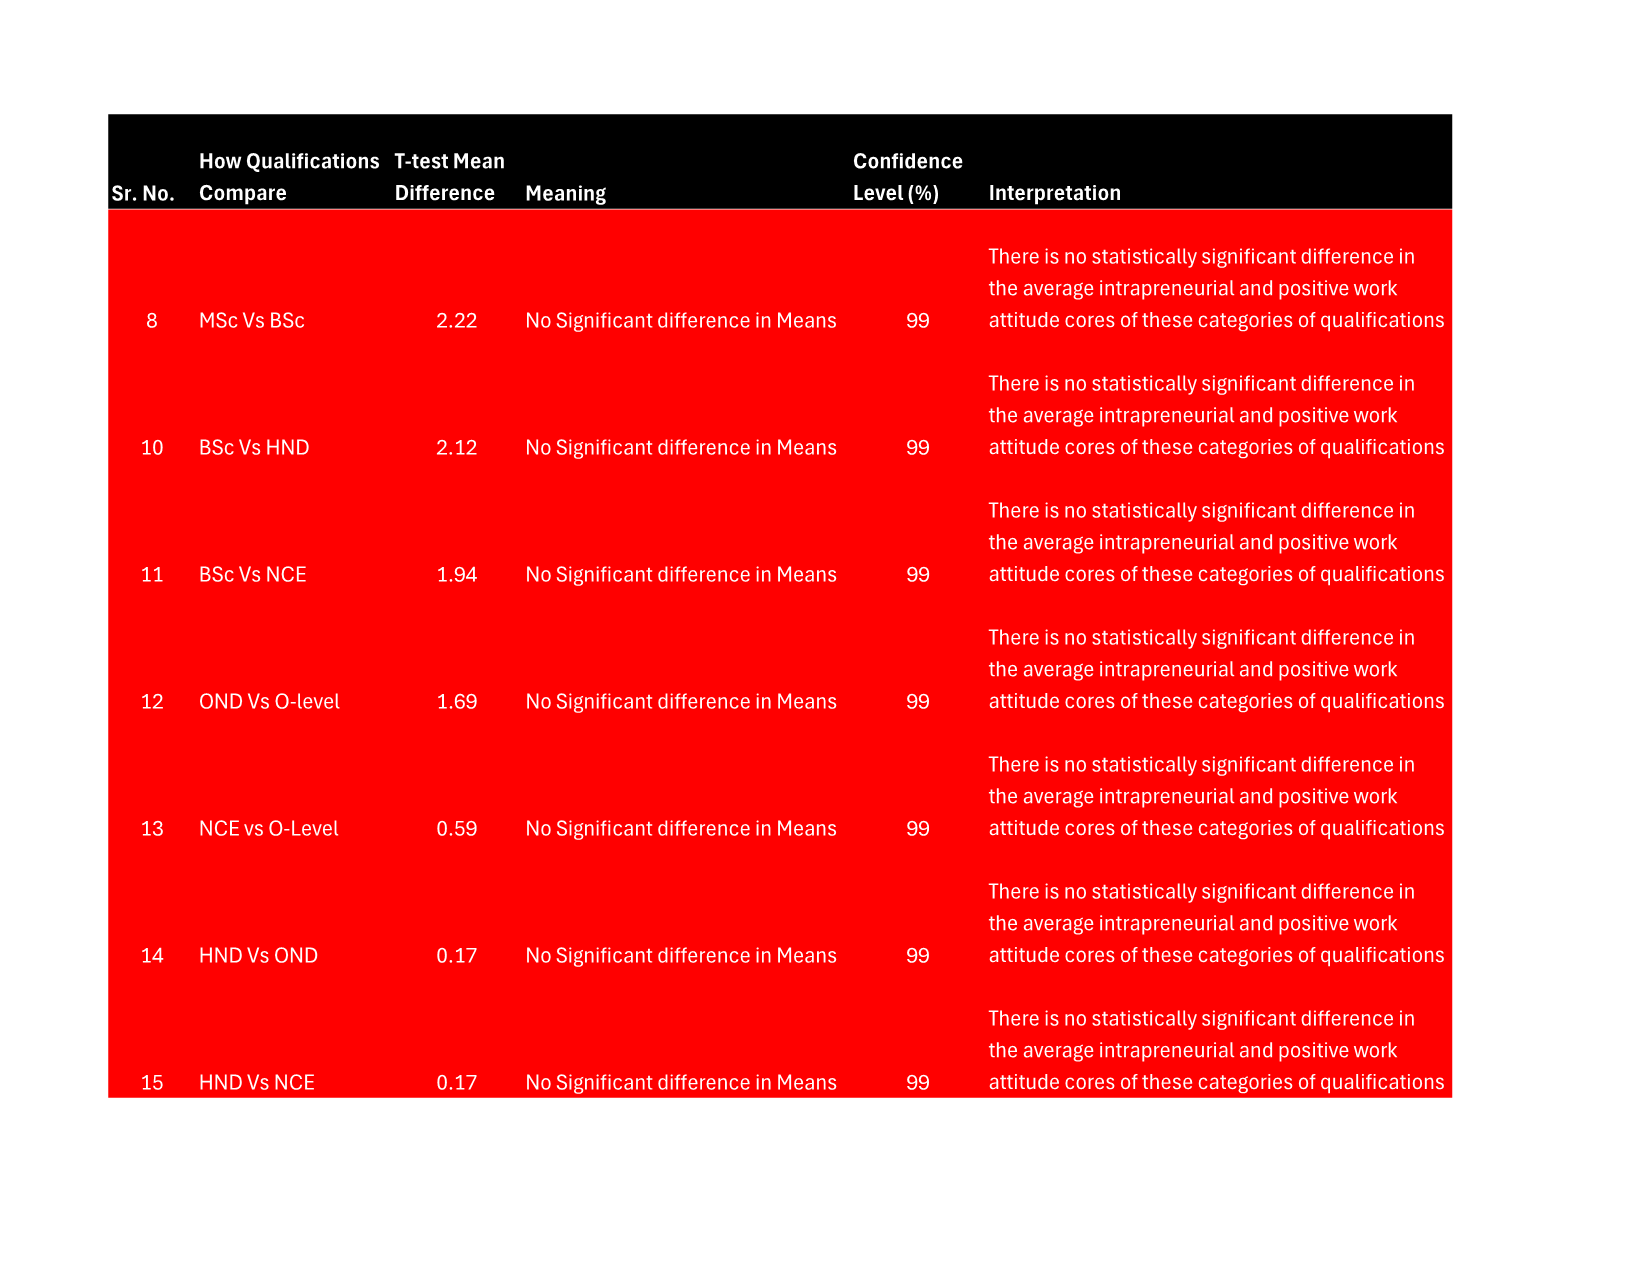
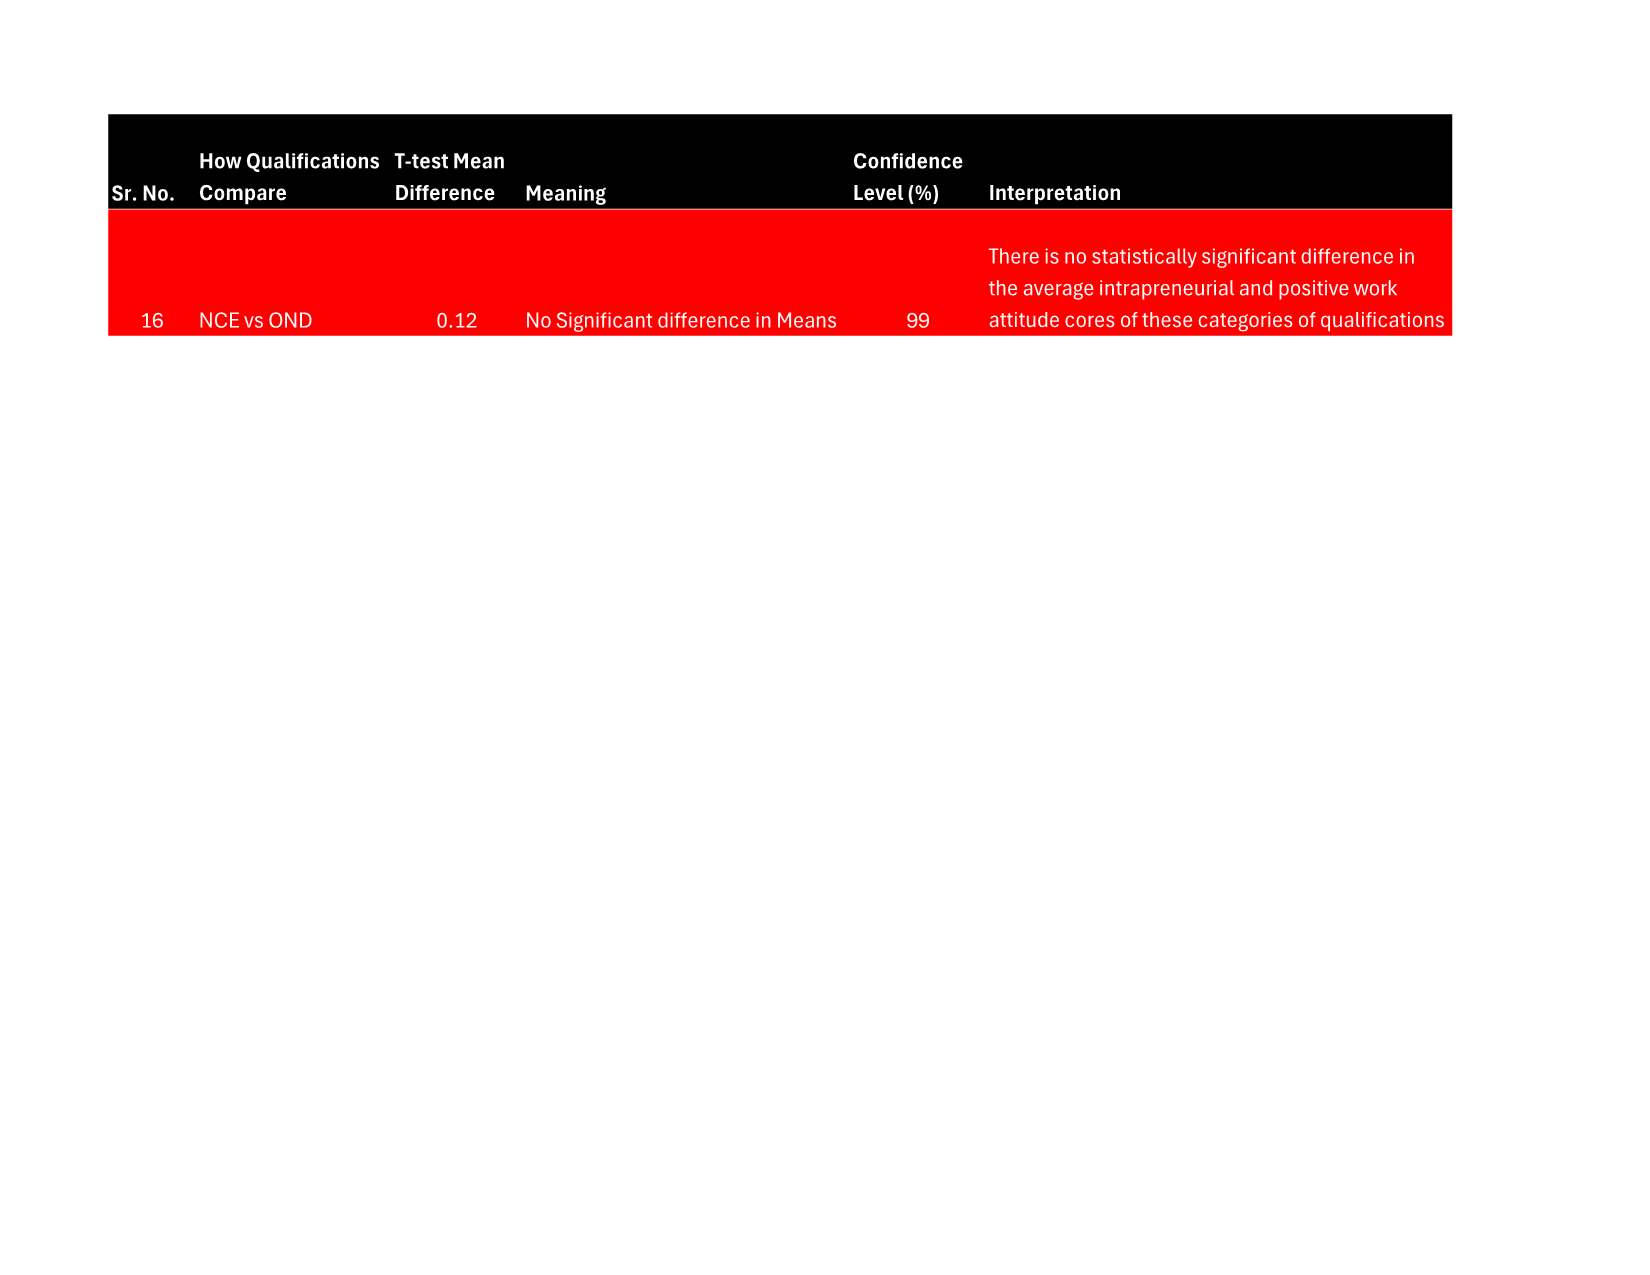

## Multiple Regression Model to Predict Dependent Money Generation Skills Using Money Retention Skills, and Financial Philosophy

In [38]:
X = findex[['fin_philosophy','money_retention']]
y= findex['dep_money_generation']
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X.values, y)

#predict the Money Retention Skills  for person   where the  Financial Philosophy 70 and money retention is 70 :
predicted_dep_mog = regr.predict([[70, 70]])
print(f'The Dependent Money Generation Skills is: {predicted_dep_mog.round(1)}')



The Dependent Money Generation Skills is: [72.7]


# Conclusion
>> ### Age and Money Multiplication Skills have a relatively weak correlation to Dependent Money Generation and therefore not used as part of the predictive model
>> ### Qualifications show some level of correlation between extreme cases like the mean difference between O level and master's degree. The association is not consistent along all the categories of qualification.
>> ### Although Money Multiplication Skills (an indicator of a basic and practical understanding of investment) have a strong correlation to Dependent Money Generation Skills, many employees may be disadvantaged and therefore affect the accuracy of prediction.

# Appendix

## Code for the Ttest Analysis for The Mean Differences Among Qualification Categories

In [42]:
#MSc Vs O leve Mean Difference
from scipy.stats import ttest_ind
statistic, pvalue  =ttest_ind(msc_pop.dep_money_generation, olv_pop.dep_money_generation)

print(f'T Statistic is: {statistic.round(4)}')
print(f' p_value is: {pvalue.round(4)}')


T Statistic is: 5.0288
 p_value is: 0.0


In [43]:
#MSc Vs OND Mean Difference
from scipy.stats import ttest_ind
statistic, pvalue =ttest_ind(msc_pop.dep_money_generation, ond_pop.dep_money_generation)
print(f'T Statistic is: {statistic.round(4)}')
print(f' p_value is: {pvalue.round(4)}')

T Statistic is: 3.7642
 p_value is: 0.0005


In [44]:
#MSc Vs NCE Mean Difference
from scipy.stats import ttest_ind
statistic, pvalue =ttest_ind(msc_pop.dep_money_generation, nce_pop.dep_money_generation)
print(f'T Statistic is: {statistic.round(4)}')
print(f' p_value is: {pvalue.round(4)}')

T Statistic is: 1.9561
 p_value is: 0.0671


In [45]:
#MSc Vs HND Mean Difference
from scipy.stats import ttest_ind
statistic, pvalue =ttest_ind(msc_pop.dep_money_generation, hnd_pop.dep_money_generation)
print(f'T Statistic is: {statistic.round(4)}')
print(f' p_value is: {pvalue.round(4)}')

T Statistic is: 2.8537
 p_value is: 0.0084


In [46]:
#MSc Vs BSc Mean Difference
from scipy.stats import ttest_ind
statistic, pvalue =ttest_ind(msc_pop.dep_money_generation, bsc_pop.dep_money_generation)
print(f'T Statistic is: {statistic.round(4)}')
print(f' p_value is: {pvalue.round(4)}')

T Statistic is: 1.6208
 p_value is: 0.108


In [47]:
#BSc Vs HND Mean Difference
from scipy.stats import ttest_ind
statistic, pvalue =ttest_ind(bsc_pop.dep_money_generation, hnd_pop.dep_money_generation)
print(f'T Statistic is: {statistic.round(4)}')
print(f' p_value is: {pvalue.round(4)}')

T Statistic is: 2.108
 p_value is: 0.0374


In [48]:
#BSc Vs NCE Mean Difference
from scipy.stats import ttest_ind
statistic, pvalue =ttest_ind(bsc_pop.dep_money_generation, nce_pop.dep_money_generation)
print(f'T Statistic is: {statistic.round(4)}')
print(f' p_value is: {pvalue.round(4)}')

T Statistic is: 1.3058
 p_value is: 0.1947


In [49]:
#BSc Vs OND Mean Difference
from scipy.stats import ttest_ind
statistic, pvalue =ttest_ind(bsc_pop.dep_money_generation, ond_pop.dep_money_generation)
print(f'T Statistic is: {statistic.round(4)}')
print(f' p_value is: {pvalue.round(4)}')

T Statistic is: 3.3292
 p_value is: 0.0011


In [50]:
#BSc Vs O LEVEL Mean Difference
from scipy.stats import ttest_ind
statistic, pvalue =ttest_ind(bsc_pop.dep_money_generation, olv_pop.dep_money_generation)
print(f'T Statistic is: {statistic.round(4)}')
print(f' p_value is: {pvalue.round(4)}')

T Statistic is: 5.2175
 p_value is: 0.0


In [51]:
#HND Vs OND Mean Difference
from scipy.stats import ttest_ind
statistic, pvalue =ttest_ind(hnd_pop.dep_money_generation, ond_pop.dep_money_generation)
print(f'T Statistic is: {statistic.round(4)}')
print(f' p_value is: {pvalue.round(4)}')

T Statistic is: 0.1275
 p_value is: 0.8992


In [52]:
# HND Vs O Level Mean Difference
from scipy.stats import ttest_ind
statistic, pvalue =ttest_ind(hnd_pop.dep_money_generation, olv_pop.dep_money_generation)
print(f'T Statistic is: {statistic.round(4)}')
print(f' p_value is: {pvalue.round(4)}')

T Statistic is: 1.3662
 p_value is: 0.1801


In [53]:
# NCE Vs O Level Mean Difference
from scipy.stats import ttest_ind
statistic, pvalue =ttest_ind(nce_pop.dep_money_generation, olv_pop.dep_money_generation)
print(f'T Statistic is: {statistic.round(4)}')
print(f' p_value is: {pvalue.round(4)}')

T Statistic is: 0.5876
 p_value is: 0.5615


In [54]:
# OND Vs O Level Mean Difference
from scipy.stats import ttest_ind
statistic, pvalue =ttest_ind(ond_pop.dep_money_generation, olv_pop.dep_money_generation)
print(f'T Statistic is: {statistic.round(4)}')
print(f' p_value is: {pvalue.round(4)}')

T Statistic is: 1.6853
 p_value is: 0.0976


In [55]:
# HND Vs NCE Mean Difference
from scipy.stats import ttest_ind
statistic, pvalue =ttest_ind(hnd_pop.dep_money_generation, nce_pop.dep_money_generation)
print(f'T Statistic is: {statistic.round(4)}')
print(f' p_value is: {pvalue.round(4)}')

T Statistic is: 0.1675
 p_value is: 0.8695


In [56]:
# NCE Vs OND Mean Difference
from scipy.stats import ttest_ind
statistic, pvalue =ttest_ind(ond_pop.dep_money_generation, nce_pop.dep_money_generation)
print(f'T Statistic is: {statistic.round(4)}')
print(f' p_value is: {pvalue.round(4)}')

T Statistic is: 0.1238
 p_value is: 0.9022


In [57]:
# OND Vs O LEVEL Mean Difference
from scipy.stats import ttest_ind
statistic, pvalue =ttest_ind(ond_pop.dep_money_generation, olv_pop.dep_money_generation)
print(f'T Statistic is: {statistic.round(4)}')
print(f' p_value is: {pvalue.round(4)}')

T Statistic is: 1.6853
 p_value is: 0.0976


## Codes for Calculating the Correlation Coefficients and P_value of the financial habits

In [59]:
#Calculate the Correlation coefficient and the p-value using the Pearsonr function rounding it to 4 decimal places
fin_phi_coff, p = pearsonr(x=findex.fin_philosophy, y=findex.dep_money_generation)
print(f'Correlation coefficient of Financial Philosophy is: {fin_phi_coff.round(4)}')
print(f'The p_value for Financial Philosophy is:{p.round(4)}')


Correlation coefficient of Financial Philosophy is: 0.7419
The p_value for Financial Philosophy is:0.0


In [60]:
#Calculate the Correlation coefficient and the p-value using the Pearsonr function rounding it to 4 decimal places
mon_ren_coff, p = pearsonr(x=findex.money_retention, y=findex.dep_money_generation)
print(f'Correlation coefficient of Money Retention is: {mon_ren_coff.round(4)}')
print(f'The p_value for Money Retention is: {p.round(4)}')



Correlation coefficient of Money Retention is: 0.794
The p_value for Money Retention is: 0.0


In [61]:
#Calculate the Correlation coefficient and the p-value using the Pearsonr function rounding it to 4 decimal places
indep_mon_ren_coff, p = pearsonr(x=findex.ind_money_gen, y=findex.dep_money_generation)
print(f'Correlation coefficient of Independent Money Generation is: {indep_mon_ren_coff.round(4)}')
print(f'The p_value for Independent Money Generation is: {p.round(4)}')

Correlation coefficient of Independent Money Generation is: 0.7155
The p_value for Independent Money Generation is: 0.0


In [62]:
#Calculate the Correlation coefficient and the p-value using the Pearsonr function rounding it to 4 decimal places
mon_mul_coff, p = pearsonr(x=findex.money_multiplication, y=findex.dep_money_generation)
print(f'Correlation coefficient of Money Multiplication is: {mon_mul_coff.round(4)}')
print(f'The p_value for Money Multiplication is: {p.round(4)}')

Correlation coefficient of Money Multiplication is: 0.6419
The p_value for Money Multiplication is: 0.0


In [63]:
#Calculate the Correlation coefficient and the p-value using the Pearsonr function rounding it to 4 decimal places
age_coff, p = pearsonr(x=findex.age, y=findex.dep_money_generation)
print(f'Correlation coefficient of Money Multiplication is: {age_coff.round(4)}')
print(f'The p_value for Participants Age is: {p.round(4)}')

Correlation coefficient of Money Multiplication is: 0.3564
The p_value for Participants Age is: 0.0
